PROBLEM STATEMENT : CREDIT CARD FRAUD DETECTION

We need to predict if the given transaction done by the customer is fraudelent or not, by analyzing PCA transformed original features.

Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### 1. Reading the Dataset

In [2]:
# Importing the dataset to pandas dataframe
cc_data = pd.read_csv(r'C:\Users\lucky\Documents\My Stuff\ML\Credit Card Fraud\creditcard.csv')
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Observations :

    1. The features given are not original (due to security reasons) but PCA transformed features from V1 to V28 are given.
    2. Time, Amount and Target Class are also present in the data.

### 2. Exploratory Data Analysis

In [3]:
print("Dimension : {}".format(cc_data.shape), "\n")
print("Size : {}".format(cc_data.size), "\n")
print("No. of Duplicated Values : {}".format(cc_data.duplicated().sum()), "\n")
print("No. of NULL Values in each column :\n{}".format(cc_data.isnull().sum()), "\n")

Dimension : (284807, 31) 

Size : 8829017 

No. of Duplicated Values : 1081 

No. of NULL Values in each column :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 



In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cc_data['Class'].unique()

array([0, 1], dtype=int64)

Observations :

    1. No NULL values in any of the columns.
    2. There are 2 types of variables :-

        (i) Numerical
            -> V1 to V28, AMOUNT, TIME
            -> Independent variables
        (ii) Categorial
            -> CLASS (because it takes binary values)
            -> Dependent variable
    3. CLASS takes binary values 0 and 1, where

        0 : Legit Transaction
    
        1 : Fraudelent Transaction

Text(1, 246, '492')

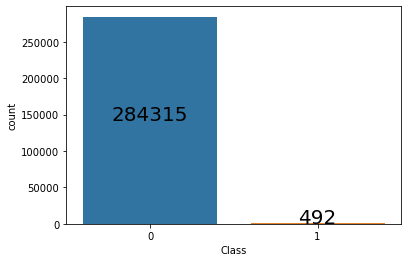

In [6]:
# Distribution of Legit and Fraudelent transactions
sns.countplot(data = cc_data, x = 'Class')
legit, fraud = cc_data.Class.value_counts()
plt.text(0, legit//2, legit, fontsize = 20, horizontalalignment = 'center')
plt.text(1, fraud//2, fraud, fontsize = 20, horizontalalignment = 'center')

Observations :

    1. Given dataset is highly imbalanced (around 99%)
    2. Training imbalanced data for predictions may result in poor performance (as it will favour the data for legit transaction)

In [7]:
# Seperating the data for analysis
legit = cc_data[cc_data['Class'] == 0]
print("legit : {}".format(legit.shape))

fraud = cc_data[cc_data['Class'] == 1]
print("fraud : {}".format(fraud.shape))

legit : (284315, 31)
fraud : (492, 31)


In [8]:
# Taking statistical measure of AMOUNT
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# Comparing the mean values for both transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Observations :

    1. Average amount in fraud transactions is more than in legit transactions.
    2. Transactions in fraud cases are more spreaded as compared to the transactions in legit cases.

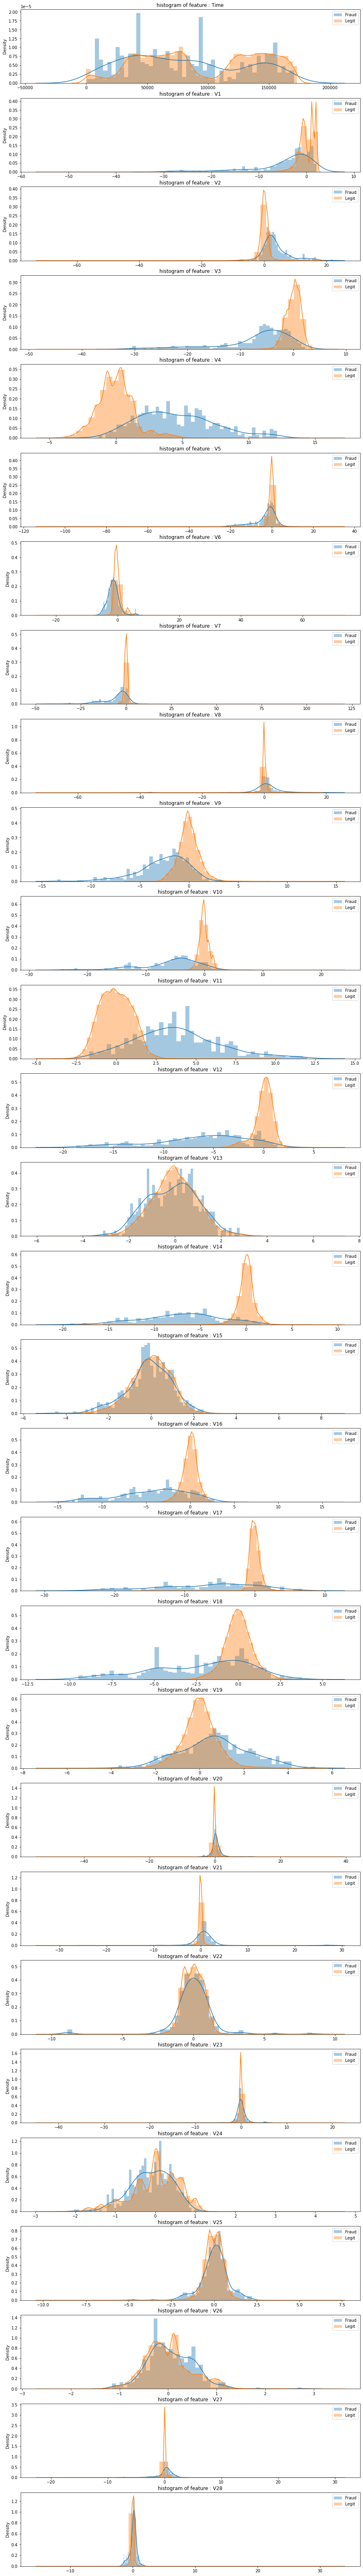

In [11]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

features = cc_data.iloc[:,0:29].columns
plt.figure(figsize = (15,29*4))
gs = gridspec.GridSpec(29,1)

for i,c in enumerate(cc_data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_data[c][cc_data.Class == 1], bins = 50, label = 'Fraud')
    sns.distplot(cc_data[c][cc_data.Class == 0], bins = 50, label = 'Legit')
    ax.legend()
    ax.set_xlabel('')
    ax.set_title ('histogram of feature : ' + str(c))

plt.show()

Observation :

    There is a clear difference between both transactions in each histogram, i.e., legit cases are generally concentrated have sharp curve, whereas fraud cases are spreaded.

Text(0.5, 0, 'Time')

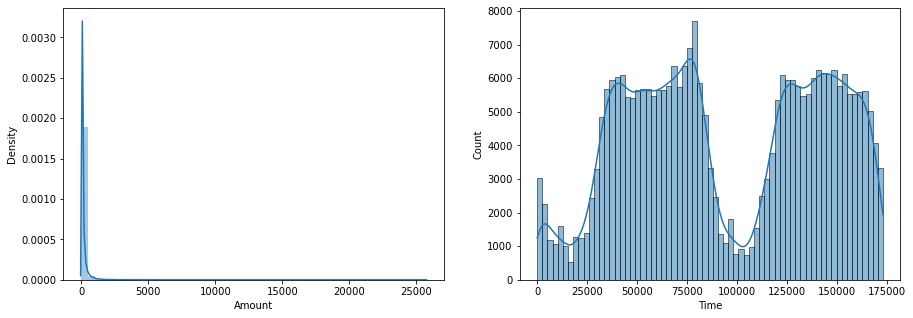

In [12]:
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.distplot(cc_data.Amount.values, kde = True)
plt.xlabel('Amount')

plt.subplot(122)
sns.histplot(cc_data.Time.values, kde = True)
plt.xlabel('Time')

Text(0.5, 0, 'TIme Domain in Fraud cases')

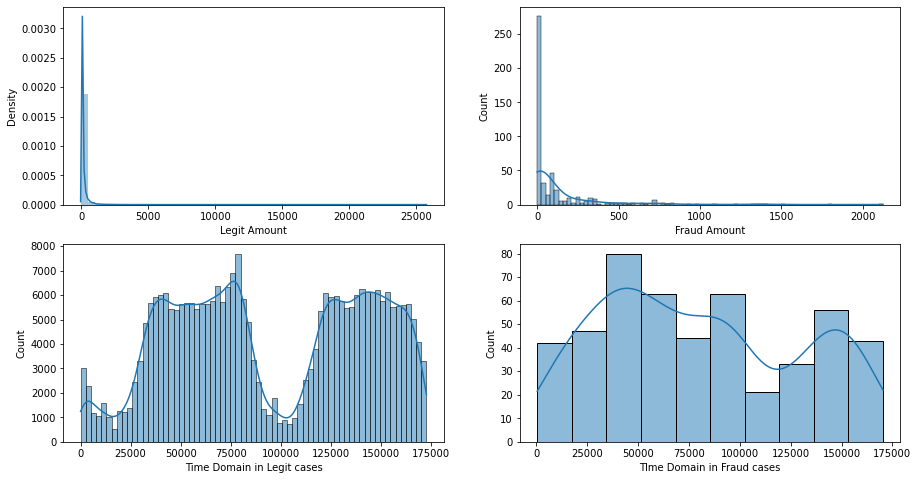

In [13]:
plt.figure(figsize = (15,8))

plt.subplot(221)
sns.distplot(cc_data[cc_data.Class == 0].Amount.values, kde = True)
plt.xlabel('Legit Amount')

plt.subplot(222)
sns.histplot(cc_data[cc_data.Class == 1].Amount.values, kde = True)
plt.xlabel('Fraud Amount')

plt.subplot(223)
sns.histplot(cc_data[cc_data.Class == 0].Time.values, kde = True)
plt.xlabel('Time Domain in Legit cases')

plt.subplot(224)
sns.histplot(cc_data[cc_data.Class == 1].Time.values, kde = True)
plt.xlabel('TIme Domain in Fraud cases')

Observations :
1. Amount
        -> It is left skewed in legit cases, which indicates low volume bank transactions.
        -> On the other hand, Cash outflow is larger in fraud transactions.
        
2. TIme
        -> Legit transactions are periodic/seasonal which indicates a specific routine of people.
        -> Fraud transactions don't follow any such trend.

### 3. Scaling the Data

Since all the features (except AMOUNT and TIME) are PCA transformed, and thus scaled.

We have to scale AMOUNT and TIME

In [14]:
std_scaler = StandardScaler()

# Normalizing the data
cc_data['scaled_amount'] = std_scaler.fit_transform(cc_data['Amount'].values.reshape(-1,1))
cc_data['scaled_time'] = std_scaler.fit_transform(cc_data['Time'].values.reshape(-1,1))

cc_data.drop(['Time','Amount'], axis = 1, inplace = True)

<AxesSubplot:>

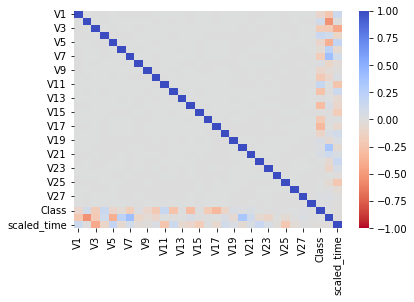

In [15]:
sns.heatmap(cc_data.corr(), cmap = 'coolwarm_r', vmin = -1, vmax = 1, center = 0)

Observation :
    
    We can see that no features are correlated, but this is might due to imbalanced dataset.
    
    So, we need to balance the data first.

### 4. Handling Unbalanced Data

#### Under-Sampling

In [16]:
# Reducing the size of legit transaction datset nearly equal to fraudelent transactions
legit = cc_data[cc_data['Class'] == 0]
fraud = cc_data[cc_data['Class'] == 1]

legit_sample = legit.sample(n = len(fraud))

In [17]:
# Building a sample dataset containing similar distribution of legit and fraudelent transaction
sample_data = pd.concat([legit_sample, fraud], axis = 0)
sample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
6245,1.122228,0.755413,0.738253,3.182689,-0.198063,-0.466962,-0.061034,-0.133105,0.989040,-0.317903,...,-0.313545,-0.050796,0.573705,0.565085,0.018496,-0.003291,0.042932,0,-0.322924,-1.842607
65838,0.038645,0.544426,0.422857,-1.124855,0.535420,-0.128674,0.423278,-0.895771,-0.609034,-0.512476,...,-1.810771,-0.199729,-0.827771,0.902080,0.648224,-0.015659,0.149812,0,-0.180112,-0.906435
274469,-0.358673,1.450143,-0.080553,0.916840,0.849065,-0.848996,1.429045,-0.283844,-0.463918,0.308588,...,0.641755,-0.280915,0.000539,0.077307,-0.369802,0.550701,0.305025,0,-0.301374,1.499538
247076,0.151810,1.124142,-0.529989,-0.163014,0.905035,-1.302346,1.066743,-0.415762,-0.207058,-0.928224,...,1.079251,-0.237222,-0.150725,-0.343097,-0.166377,0.015131,0.139893,0,-0.335638,1.234692
117628,1.091239,-0.174526,1.003608,1.257442,-0.879607,-0.002144,-0.554973,0.222586,0.678608,0.019884,...,0.516599,-0.156490,0.344933,0.580136,-0.231776,0.045967,0.020932,0,-0.241923,-0.422609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024,1.565196
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191,1.569513
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818,1.569597
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302,1.582548


Text(1, 246, '492')

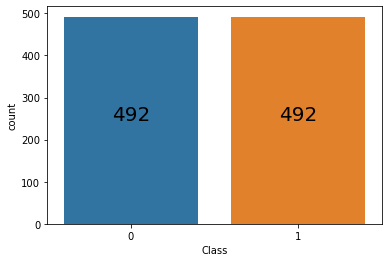

In [18]:
# Distribution of Legit and Fraudelent transactions in sample dataset
sns.countplot(data = sample_data, x = 'Class')
legit, fraud = sample_data.Class.value_counts()
plt.text(0, legit//2, legit, fontsize = 20, horizontalalignment = 'center')
plt.text(1, fraud//2, fraud, fontsize = 20, horizontalalignment = 'center')

Now since we have a uniformly balanced dataset, we can perform correlational analysis.

<AxesSubplot:>

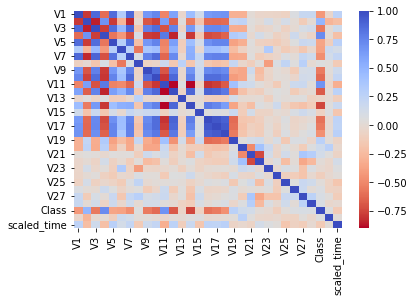

In [19]:
sns.heatmap(sample_data.corr(), cmap = 'coolwarm_r')

In [20]:
# Comparing the mean values for both transactions in sample dataset
sample_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.034463,0.014673,-0.020654,-0.024961,-0.031732,-0.075507,-0.020141,0.049154,-0.018849,0.007609,...,-0.009678,-0.025015,-0.005017,0.020327,0.008329,-0.011615,-0.012211,0.001833,0.008252,-0.005091
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382,-0.296223


Observation :

    This difference in mean data indicates that the nature of dataset does not change much. Thus, it's a good sample for prediction.

Let's look at the data in lower dimension.

#### Using TSNE

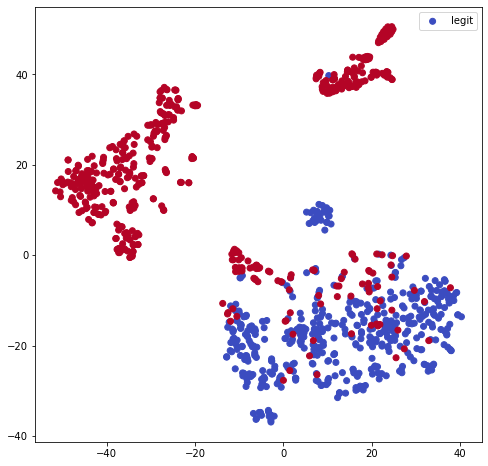

In [21]:
# Making a subset to plot points clearly
plt.figure(figsize = (8,8))
x_sub = sample_data.copy().drop('Class', axis = 1)
y_sub = sample_data.copy()['Class']
x_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(x_sub.values)
plt.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c = (y_sub == 0), cmap = 'coolwarm_r', label = 'legit')
plt.legend()

Observation :

    1. Legit and Fraudelent cases now have different clusters and hence can be seperated by single straight line.
    2. Logistic Regression Classification can work well on this dataset.

### 5. Machine Learning

In [22]:
X = sample_data.drop(columns = 'Class', axis = 1)
Y = sample_data['Class']

In [23]:
# Independent Features
print(X.shape)
X.head()

(984, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
6245,1.122228,0.755413,0.738253,3.182689,-0.198063,-0.466962,-0.061034,-0.133105,0.989040,-0.317903,...,-0.265927,-0.313545,-0.050796,0.573705,0.565085,0.018496,-0.003291,0.042932,-0.322924,-1.842607
65838,0.038645,0.544426,0.422857,-1.124855,0.535420,-0.128674,0.423278,-0.895771,-0.609034,-0.512476,...,0.306010,-1.810771,-0.199729,-0.827771,0.902080,0.648224,-0.015659,0.149812,-0.180112,-0.906435
274469,-0.358673,1.450143,-0.080553,0.916840,0.849065,-0.848996,1.429045,-0.283844,-0.463918,0.308588,...,0.079239,0.641755,-0.280915,0.000539,0.077307,-0.369802,0.550701,0.305025,-0.301374,1.499538
247076,0.151810,1.124142,-0.529989,-0.163014,0.905035,-1.302346,1.066743,-0.415762,-0.207058,-0.928224,...,0.324609,1.079251,-0.237222,-0.150725,-0.343097,-0.166377,0.015131,0.139893,-0.335638,1.234692
117628,1.091239,-0.174526,1.003608,1.257442,-0.879607,-0.002144,-0.554973,0.222586,0.678608,0.019884,...,0.140742,0.516599,-0.156490,0.344933,0.580136,-0.231776,0.045967,0.020932,-0.241923,-0.422609


In [24]:
# Dependent Features
Y

6245      0
65838     0
274469    0
247076    0
117628    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [25]:
# Splitting dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (659, 30) (325, 30)


#### Model Training

In [26]:
def model_eval(y_actual, predicted) :
    """
    Evaluates a model's accuracy using clasification report and confusion matrix
    
        Parametrs
        ---------
        y_actual : pandas.core.series.Series
            target pandas series
        
        predicted : pandas.core.series.Series
            pandas series of predictions
        ---------
        
        Returns
        -------
        classification report followed by confusion matrix for the arrays given
    """
    print(classification_report(y_actual, predicted, target_names = ['Legit','Fraud']))
    sns.heatmap(data = confusion_matrix(y_actual, predicted), annot = True, cmap = 'coolwarm_r', center = 0)

##### 1. Logistic Regression

In [27]:
model = LogisticRegression()

# Training the model with training data
model.fit(X_train, Y_train)

LogisticRegression()

##### On sample data

In [28]:
# evaluation of our model based on accuracy score
# accuracy on training data
X_train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, X_train_predictions)

print('Accuracy on training data :', train_accuracy)

Accuracy on training data : 0.9590288315629742


Observations :

    This is good, but the accuracy score of test data is important. It should not vary much with respect to training accuracy

              precision    recall  f1-score   support

       Legit       0.88      0.98      0.93       163
       Fraud       0.98      0.87      0.92       162

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

roc_auc_score on testing data : 0.925982731197455
Accuracy on testing data : 0.9261538461538461


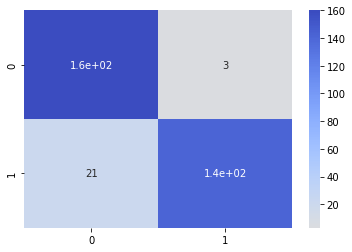

In [29]:
X_test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_predictions)
model_eval(Y_test, X_test_predictions)

print('roc_auc_score on testing data :', roc_auc_score(Y_test, X_test_predictions))
print('Accuracy on testing data :', test_accuracy)

Observations :

    The accuracies on both dataset are similar.
    If there were a vast difference in training and testing data, then our model would be considered overfitted or underfitted.

##### On original data

(284807, 30) (190820, 30) (93987, 30)
Accuracy on original training data : 0.9991353107640708
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     93825
       Fraud       0.92      0.67      0.77       162

    accuracy                           1.00     93987
   macro avg       0.96      0.83      0.89     93987
weighted avg       1.00      1.00      1.00     93987

roc_auc_score on original testing data : 0.8332800426325606
Accuracy on original testing data : 0.9993190547628927


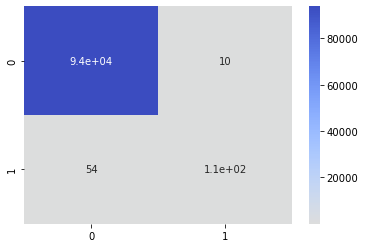

In [30]:
X_or = cc_data.drop(columns = 'Class', axis = 1)
Y_or = cc_data['Class']

X_train_or, X_test_or, Y_train_or, Y_test_or = train_test_split(X_or,Y_or, test_size = 0.33, stratify = Y_or, random_state = 2)
print(X_or.shape, X_train_or.shape, X_test_or.shape)

model.fit(X_train_or, Y_train_or)

X_train_predictions_or = model.predict(X_train_or)
train_accuracy_or = accuracy_score(Y_train_or, X_train_predictions_or)
print('Accuracy on original training data :', train_accuracy_or)

X_test_predictions_or = model.predict(X_test_or)
test_accuracy_or = accuracy_score(Y_test_or, X_test_predictions_or)
model_eval(Y_test_or, X_test_predictions_or)
print('roc_auc_score on original testing data :', roc_auc_score(Y_test_or, X_test_predictions_or))
print('Accuracy on original testing data :', test_accuracy_or)

In [31]:
def output(model, X_train, X_test, Y_train, Y_test) :
    model.fit(X_train, Y_train)
    
    X_train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, X_train_predictions)
    print('Accuracy on training data :', train_accuracy)
    
    X_test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, X_test_predictions)
    model_eval(Y_test, X_test_predictions)
    print('roc_auc_score on testing data :', roc_auc_score(Y_test, X_test_predictions))
    print('Accuracy on testing data :', test_accuracy)

##### 2. Support Vector Machine

Accuracy on training data : 0.9423368740515933
              precision    recall  f1-score   support

       Legit       0.88      0.99      0.93       163
       Fraud       0.99      0.86      0.92       162

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

roc_auc_score on testing data : 0.9259448610164357
Accuracy on testing data : 0.9261538461538461


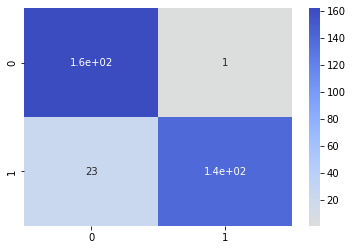

In [32]:
svc = SVC()
output(svc, X_train, X_test, Y_train, Y_test)

##### 3. KNeighbors Classifier

Accuracy on training data : 0.9438543247344461
              precision    recall  f1-score   support

       Legit       0.86      0.99      0.92       163
       Fraud       0.99      0.84      0.91       162

    accuracy                           0.92       325
   macro avg       0.93      0.92      0.92       325
weighted avg       0.93      0.92      0.92       325

roc_auc_score on testing data : 0.9166856017571765
Accuracy on testing data : 0.916923076923077


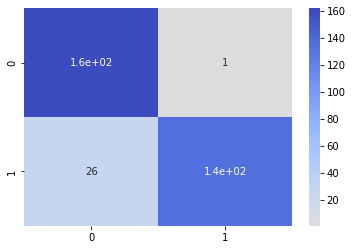

In [33]:
KNC = KNeighborsClassifier()
output(KNC, X_train, X_test, Y_train, Y_test)

##### 4. Decision Tree Classifier

Accuracy on training data : 1.0
              precision    recall  f1-score   support

       Legit       0.89      0.93      0.91       163
       Fraud       0.93      0.89      0.91       162

    accuracy                           0.91       325
   macro avg       0.91      0.91      0.91       325
weighted avg       0.91      0.91      0.91       325

roc_auc_score on testing data : 0.9107021131561008
Accuracy on testing data : 0.9107692307692308


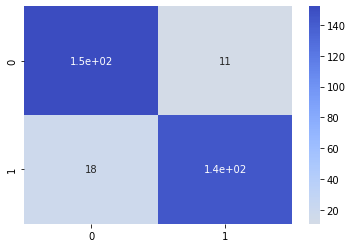

In [34]:
DTC = DecisionTreeClassifier()
output(DTC,X_train,X_test,Y_train,Y_test)

##### 5. Random Forest Classifier

Accuracy on training data : 1.0
              precision    recall  f1-score   support

       Legit       0.89      0.98      0.93       163
       Fraud       0.98      0.88      0.93       162

    accuracy                           0.93       325
   macro avg       0.93      0.93      0.93       325
weighted avg       0.93      0.93      0.93       325

roc_auc_score on testing data : 0.9290691509505414
Accuracy on testing data : 0.9292307692307692


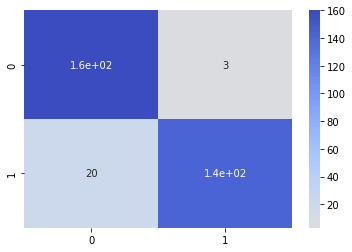

In [35]:
RFC = RandomForestClassifier()
output(RFC,X_train,X_test,Y_train,Y_test)

##### On original Data

For Decesion Tree Classifier
Accuracy on training data : 1.0
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     93825
       Fraud       0.73      0.82      0.78       162

    accuracy                           1.00     93987
   macro avg       0.87      0.91      0.89     93987
weighted avg       1.00      1.00      1.00     93987

roc_auc_score on testing data : 0.910238031796785
Accuracy on testing data : 0.9991807377616053
None


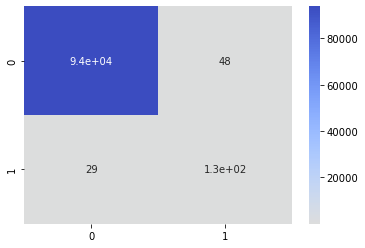

In [36]:
print("For Decesion Tree Classifier")
print(output(DTC,X_train_or,X_test_or,Y_train_or,Y_test_or))

For Random Forest Classifier
Accuracy on training data : 1.0
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     93825
       Fraud       0.92      0.82      0.87       162

    accuracy                           1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987

roc_auc_score on testing data : 0.9104298783195667
Accuracy on testing data : 0.9995637694574782
None


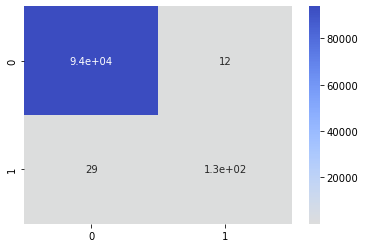

In [37]:
print("For Random Forest Classifier")
print(output(RFC,X_train_or,X_test_or,Y_train_or,Y_test_or))

### Observations

Recall on Fraudelent cases :
    
    1. Logistic Regression
        -> Accuracy = 0.9292307692307692
        -> Recall = 0.89
    2. Decision Tree Classifier
        -> Accuracy = 0.8676923076923077
        -> Recall = 0.89